**데이터 선정 이유**

코로나로 인해 비대면이 점차 강조되며 이에 기반하여 마케팅 분야에서 기존 오프라인의 중요성이 온라인으로 이동하고 있는 시점입니다. 이 언택트 마케팅에는 키워드 마케팅, 텔레마케팅 같은 다양한 분야가 있습니다. 

2021년 기준 광고는  



1.   실시간 라이브 방송을 위시로 높은 효과를 보고있는 동영상강 광고 즉 라이브 커머스
2.   챗봇 
3. VR & AR
4. SEO 및 키워드

같은 트렌드들이 자리 잡고있지만 여전히 텔레마케팅이나 스팸 마케팅 또한 활용되고 있습니다.



따라서 현 시대에 과연 텔레마케팅을 기반으로 한 마케팅 데이터가 효과적인가에 대해 분석해보고자 합니다. 사실 텔레마케팅은 현재 그렇게 유용하지 않은 방식이라고 생각합니다. 하지만 비즈니스에서 이런 추론은 항상 근거가 있어야 하기에 실제로 텔레마케팅이 유요한지, 의미가 있는지에 대해 알아 볼 것입니다. 

1. 데이터 모델링 전 데이터 알아보기

In [ ]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap
    !pip install chart_studio
    !pip install cufflinks

     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 112kB 21.6MB/s 
     |████████████████████████████████| 245kB 27.7MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 44.0MB/s 
     |████████████████████████████████| 112kB 46.9MB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 296kB 44.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=5dec8d8127a5056fb8f18b5beb08a2b62fc4be2d99bb84fcaf161a444265768e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=b027791b4ba78631f27ae74eb1f2657ce6ae17fd16b99a5365224f7cacda12a8
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653

     |████████████████████████████████| 358kB 27.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491621 sha256=dcf5453729c3f7d67686f594011d10992bbf538dcd2021612a442bbac4fb5b9d
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 71kB 3.1MB/s 


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/bank.csv')

df = df.rename(columns = {'y':'deposit'})

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

***문제 정의***

텔레 마케팅이 성공적으로 되어 예금 가입을 유도 한지의 여부에 대한 문제를 분석 해보고자 합니다.

따라서 이 문제는 분류로 접근 할 예정입니다.

텔레마케팅의

텔레마케팅의 경우 과연 이 방식이 효율적인가 부터 어떤 요소들이 텔레마케팅의 성공 여부를 결정하는가에 대해 알아 볼 것입니다.

EDA와 데이터 전처리

In [ ]:
print('Duplicated: ', df.duplicated().sum())
print(df.isnull().sum())

Duplicated:  12
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


다행히도 중복 데이터는 존재하지 않는다. 그럼 세부적인 데이터를 이해해보고자 리포트를 생성해보자

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal=True)

profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

효과적인 feature engineering을 위해 데이터를 뜯어보고 시각화를 하여 데이터를 좀 더 이해해보자

In [ ]:
df.deposit.value_counts()
#구독하지 않음의 카운트가 많다

no     36548
yes     4640
Name: deposit, dtype: int64

In [ ]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
#unknown과 other을 같이 봐야겠다
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

In [ ]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
df.euribor3m.value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

In [ ]:
df.nunique(dropna = False)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
deposit              2
dtype: int64

In [ ]:
cat_feature=[x for x in df.columns if ((df[x].dtypes=='O'))]
num_feature = [x for x in df.columns if ((df[x].dtypes !='O'))]

In [ ]:
cat_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'deposit']

In [ ]:
num_feature

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

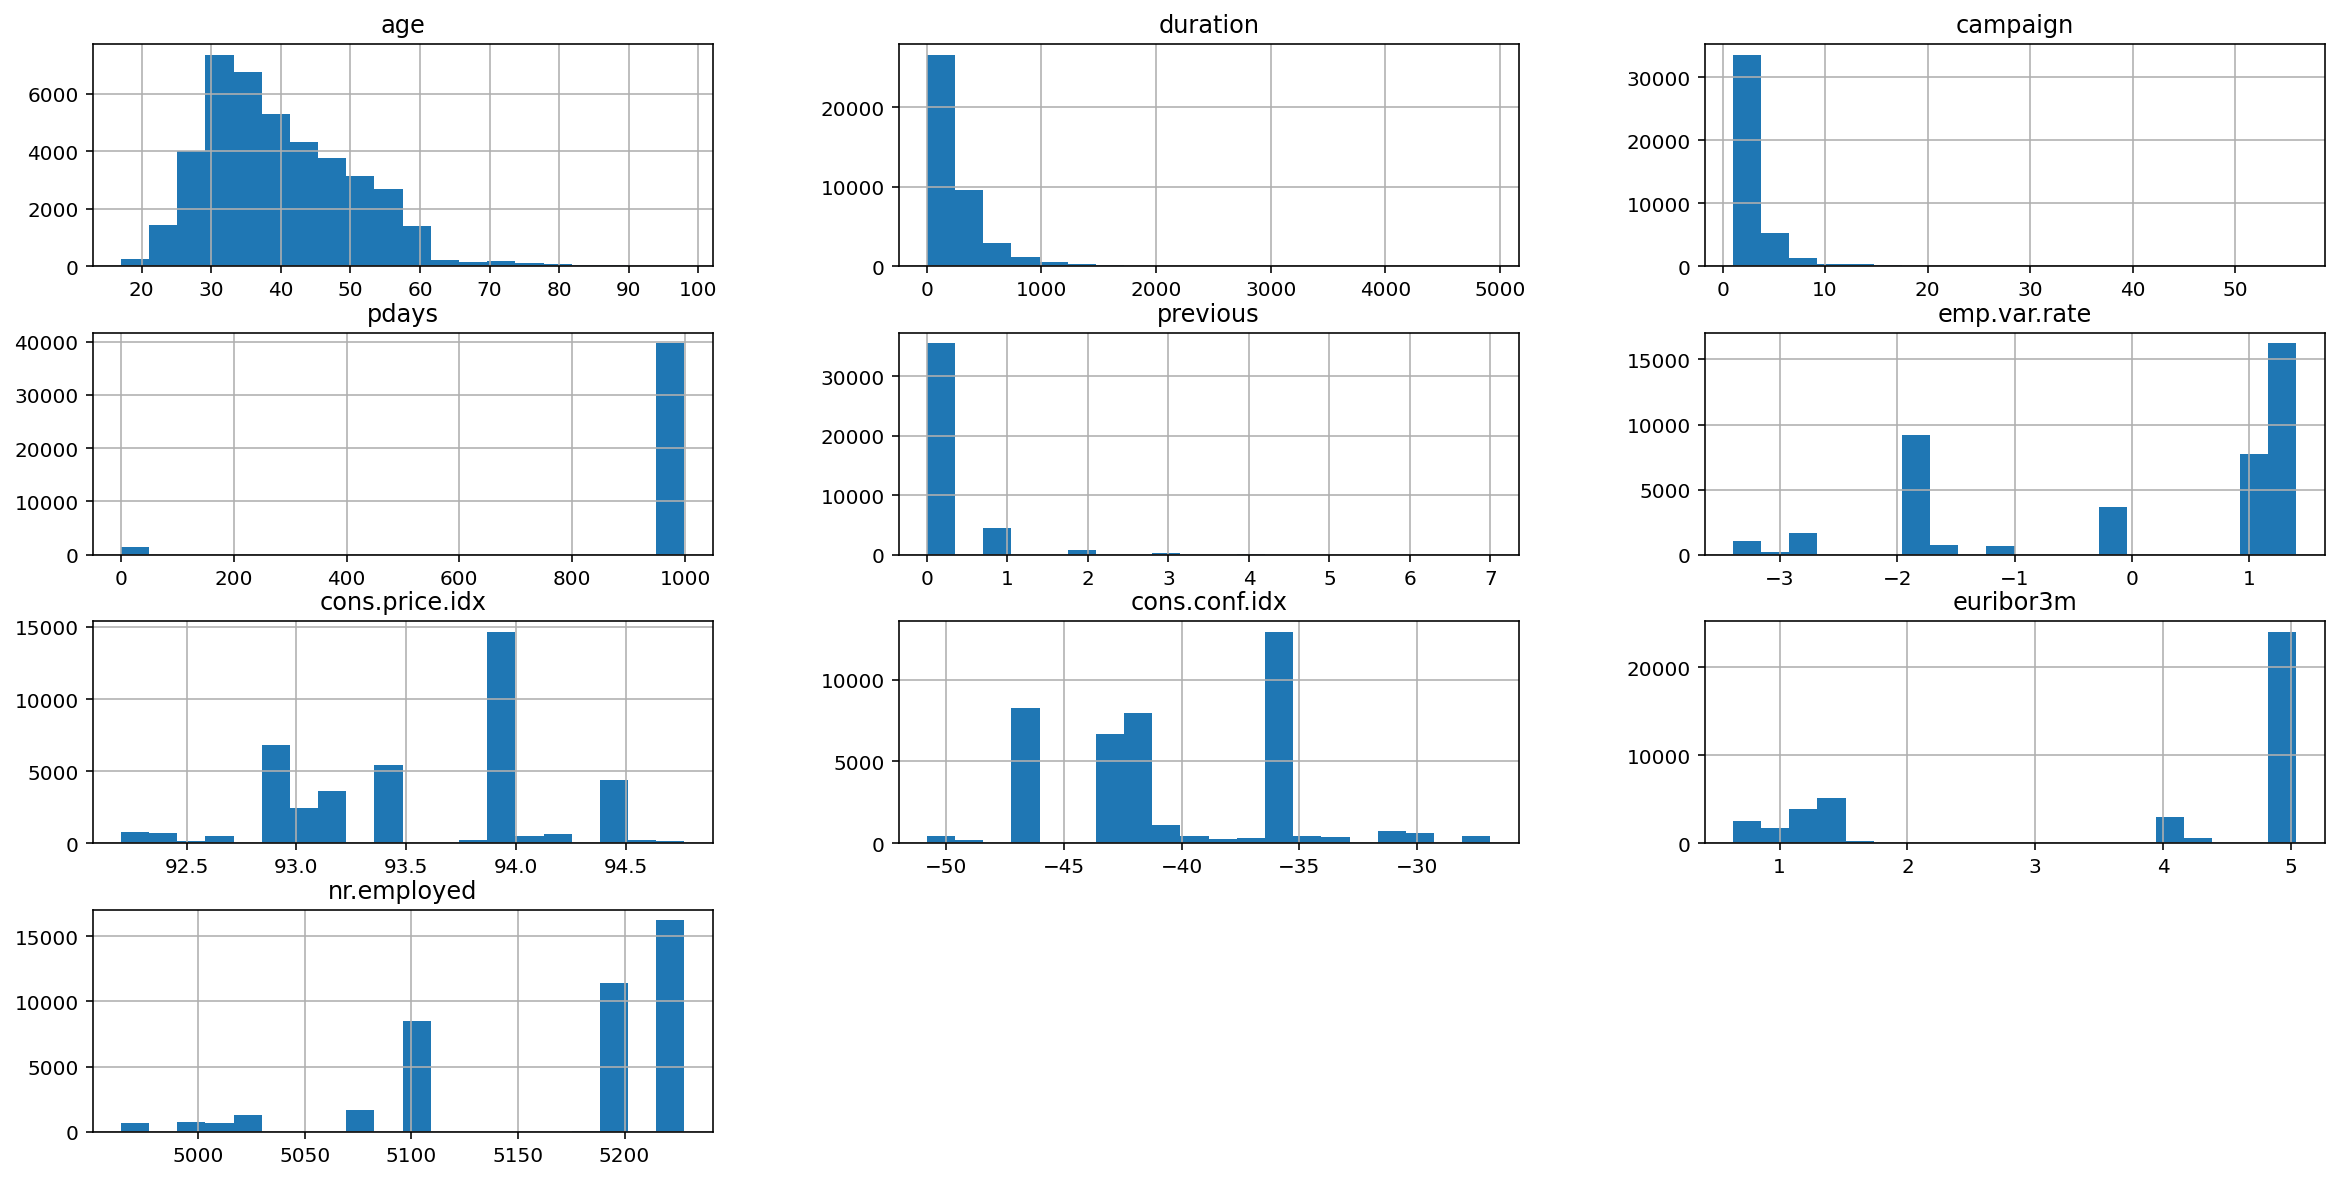

In [ ]:
df.hist(bins=20, figsize=(20,10))
plt.show()

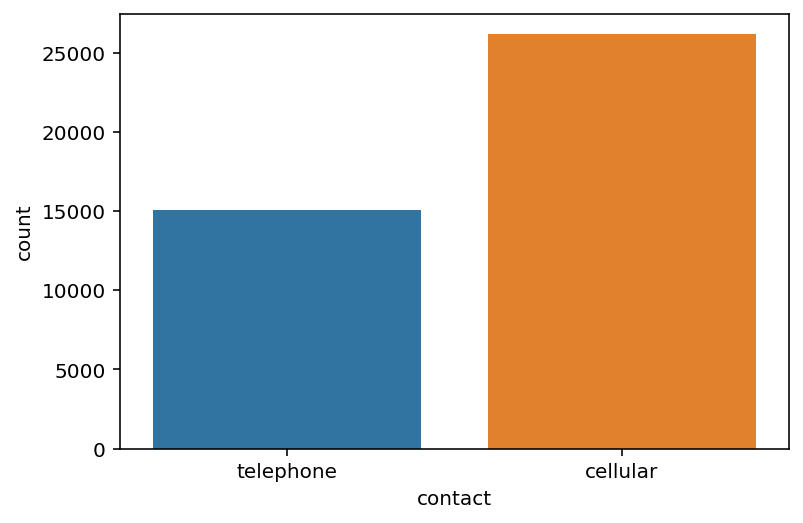

In [ ]:
sns.countplot(df['contact'], data = df);


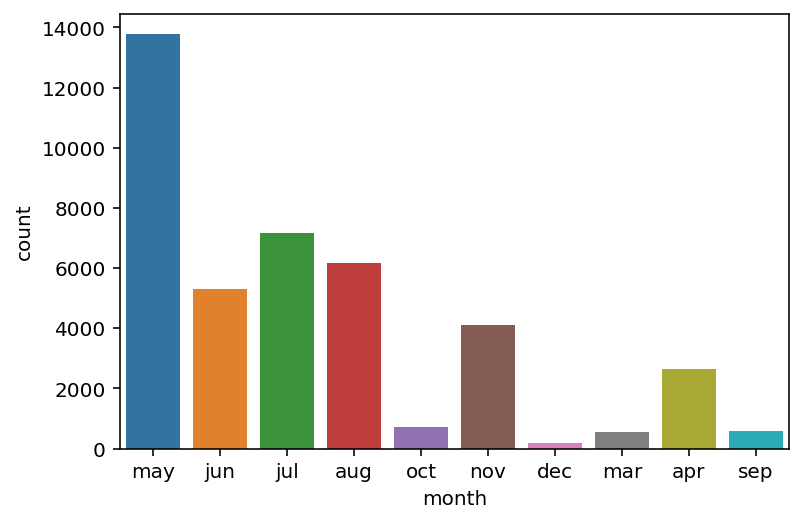

In [ ]:
sns.countplot(df['month'], data = df)

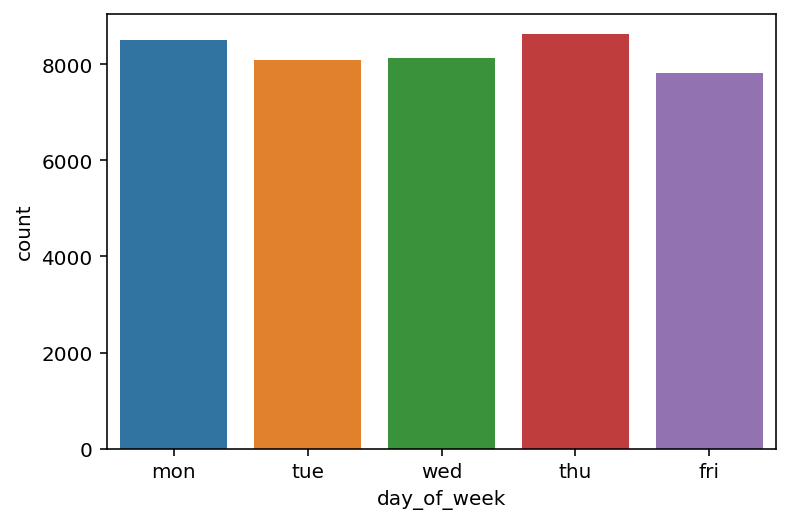

In [ ]:
sns.countplot(df['day_of_week'], data = df)

Age와 duration이 많은 고유값을 가지고 있으므로 그것에 대해 조사해보자

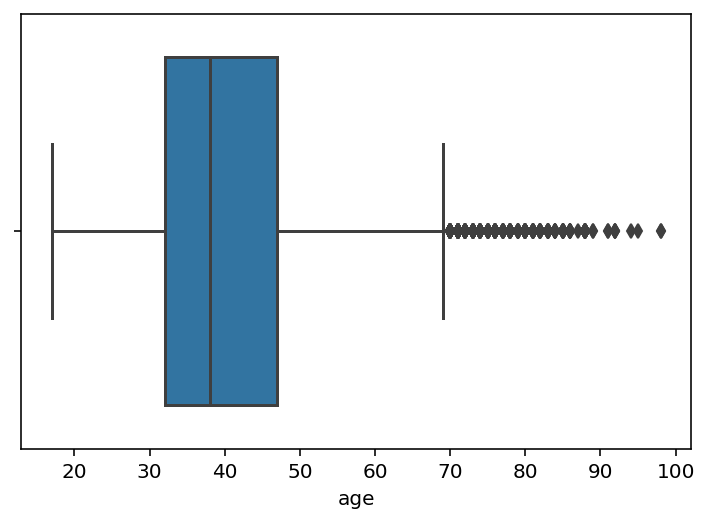

In [ ]:
#Age에 outlier들이 있는 것을 볼 수 있다
#아래 barplot을 참고해서 Age를 4그룹으로 나눌 계획

sns.boxplot(x='age', data = df)

In [ ]:
#Age 같은경우 데이터를 크게 4분할로 해줄 예정이다. 이것을 박스플롯 데이터로 구분해주자
#최종 구분은
#
print(df['age'].quantile(q = 0.25))
print(df['age'].quantile(q = 0.5))
print(df['age'].quantile(q = 0.75))
print(df['age'].quantile(q = 1))

32.0
38.0
47.0
98.0


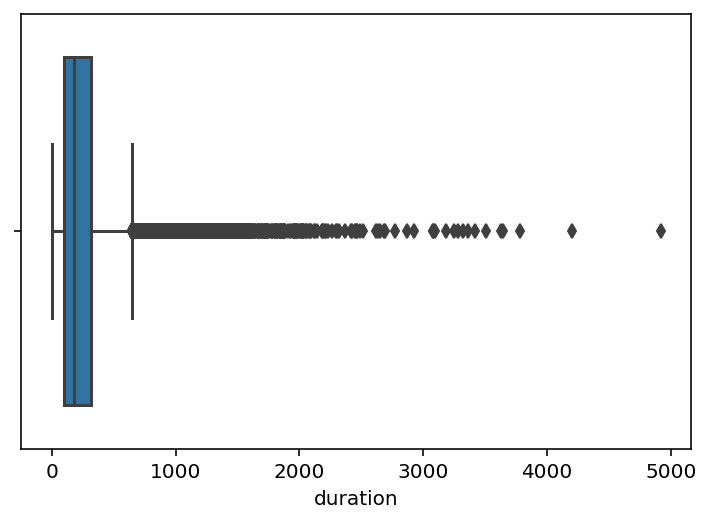

In [ ]:
#Duration은 단위가 현재 초로 되어있다
#/60을 통해 변환이 필요
sns.boxplot(x='duration', data = df)

In [ ]:
du1 =df['duration'].quantile(q = 0.25)
du2 =df['duration'].quantile(q = 0.5)
du3 =df['duration'].quantile(q = 0.75)
du4 =df['duration'].quantile(q = 1)

print(du1)
print(du2)
print(du3)
print(du4)

#duration q4 값이 4918로 급격하게 뛴다 outlier의 존재 때문인거 같다
#Outlier 값을 알아보자
#Duration의 outlier은 upperbound만 계산하면 됨
#참조: https://hungryap.tistory.com/69

iqr = du3 - du1
upper_bound = du3 + (iqr * 1.5)
print(upper_bound)

102.0
180.0
319.0
4918.0
644.5


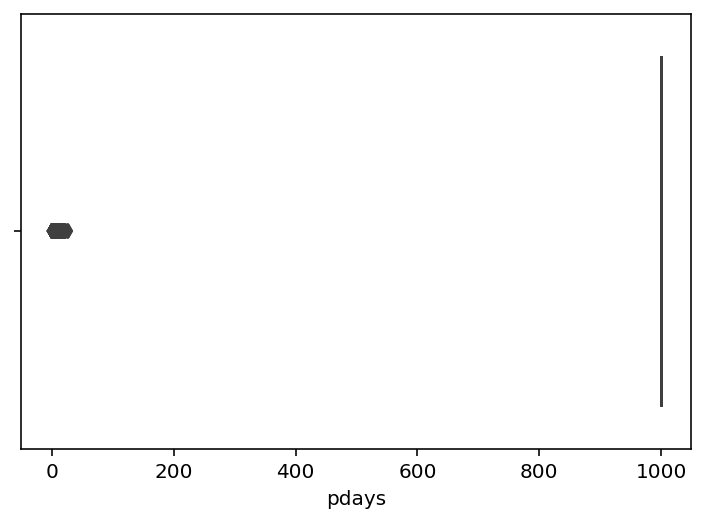

In [ ]:
sns.boxplot(x='pdays', data = df)

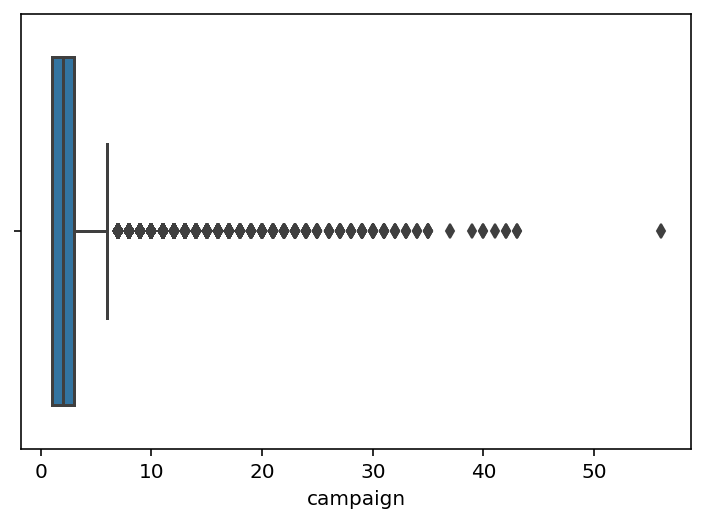

In [ ]:
sns.boxplot(x='campaign', data = df)

In [ ]:
ca1 =df['campaign'].quantile(q = 0.25)
ca2 =df['campaign'].quantile(q = 0.5)
ca3 =df['campaign'].quantile(q = 0.75)
ca4 =df['campaign'].quantile(q = 1)

print(ca1)
print(ca2)
print(ca3)
print(ca4)


iqr = ca3 - ca1
cam_upper_bound = ca3 + (iqr * 1.5)
print(cam_upper_bound)

1.0
2.0
3.0
56.0
6.0


데이터 나누기 & Feature Engineering

In [ ]:
bank = df.copy()

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.shape

(41188, 21)

In [ ]:
from sklearn.model_selection import train_test_split
target = 'deposit' 

train, test = train_test_split(bank, train_size = 0.8 , test_size = 0.2, stratify=bank[target], random_state = 2)
train, val = train_test_split(train, test_size=0.2, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape

((26360, 21), (6590, 21), (8238, 21))

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Feature Engineering을 해보자
def eda(bank):
  #Cardinality 높은 것은 없으니 제거가 필요한 column은 없어 보인다
  
  #여기서는 단순 인코더로 변환 가능한 데이터
  
  #검색을 통해 카테고리를 숫자화 해주는 효과적인 방법이 없을까? 검색한 결과
  #방법1 astype('category').cat.codes
  #방법2 astype(LabelEncoder)
  #Label encoder가 방법1의 단점을 상쇄 시켜준다
  le = LabelEncoder()

  bank['marital'] = le.fit_transform(bank['marital']) 
  bank['education'] = le.fit_transform(bank['education']) 
  bank['contact'] = le.fit_transform(bank['contact']) 
  bank['month'] = le.fit_transform(bank['month'])
  bank['default'] = le.fit_transform(bank['default']) 
  bank['poutcome'] = le.fit_transform(bank['poutcome']) 
  bank['job'] = le.fit_transform(bank['job']) 
  bank['housing'] = le.fit_transform(bank['housing']) 
  bank['loan'] = le.fit_transform(bank['loan']) 
  bank['deposit'] = le.fit_transform(bank['deposit']) 
 
  #여기서부터는 구간별로 나눠야 하는 데이터
  #Age 구간별로 나누자 (Age = 77개의 unique)
  #Barplot을 참고해서 q1 q2 q3 q4기준으로 나누었다
  bank.loc[bank['age'] <= 32, 'age'] = 1
  bank.loc[(bank['age'] > 32) & (bank['age'] <= 47), 'age'] = 2
  bank.loc[(bank['age'] > 47) & (bank['age'] <= 70), 'age'] = 3
  bank.loc[(bank['age'] > 70) & (bank['age'] <= 98), 'age'] = 4


  bank.loc[bank['duration'] <= 103, 'duration'] = 1
  bank.loc[(bank['duration'] > 103) & (bank['duration'] <= 180)  , 'duration']    = 2
  bank.loc[(bank['duration'] > 180) & (bank['duration'] <= 319)  , 'duration']   = 3
  bank.loc[(bank['duration'] > 319) & (bank['duration'] <=643), 'duration'] = 4
  bank.loc[bank['duration']  > 643, 'duration'] = 5 #Outlier

  return bank

train = eda(train)
val = eda(val)
test = eda(test)

In [ ]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
36994,2,0,2,6,0,0,0,0,3,fri,5,1,999,0,1,-2.9,92.469,-33.6,1.059,5076.2,1
22519,2,0,1,6,0,2,0,0,1,fri,1,1,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0
10178,3,9,1,5,0,2,0,1,4,thu,4,2,999,0,1,1.4,94.465,-41.8,4.958,5228.1,0
3836,3,9,1,3,0,0,0,1,6,fri,3,3,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
2060,3,7,0,3,1,0,0,1,6,mon,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
target = 'deposit' 
features = train.columns.drop('deposit')

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36994,2,0,2,6,0,0,0,0,3,fri,5,1,999,0,1,-2.9,92.469,-33.6,1.059,5076.2
22519,2,0,1,6,0,2,0,0,1,fri,1,1,999,0,1,1.4,93.444,-36.1,4.964,5228.1
10178,3,9,1,5,0,2,0,1,4,thu,4,2,999,0,1,1.4,94.465,-41.8,4.958,5228.1
3836,3,9,1,3,0,0,0,1,6,fri,3,3,999,0,1,1.1,93.994,-36.4,4.859,5191.0
2060,3,7,0,3,1,0,0,1,6,mon,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
y_train

36994    1
22519    0
10178    0
3836     0
2060     0
        ..
23397    0
25431    0
32087    0
24402    1
12385    1
Name: deposit, Length: 26360, dtype: int64

In [ ]:
#Baseline Model - mode의 accuracy를 기준

# 우선 target 비율을 보고 불균형모델인지 균형모델인지 알아봄.
rate = train[target].value_counts(normalize=True)
rate

0    0.887329
1    0.112671
Name: deposit, dtype: float64

In [ ]:
#Baseline training accuracy
major = y_train.mode()[0]
y_pred = [major] * len(y_train)

from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.887329286798179


In [ ]:
# Baseline validation accuracy
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.8874051593323217


In [ ]:
#불균형 해소
ratio = rate[1]/rate[0]
ratio

0.12697734074390765

In [ ]:
#Cat Encoder에 들어갈 카테고리 요소들 지정
cat_feature=[x for x in bank.columns if ((bank[x].dtypes=='O'))]
cat_feature.remove('deposit')
cat_feature.remove('month')
cat_feature.remove('day_of_week')

In [ ]:
#기존 Cat encoding으로 하면 알파벳 순으로 매핑되어서 매핑 지정해주자
ord_feature = ['month', 'day_of_week', 'poutcome']

ord_mapping = [
        {'col' : 'month',
        'mapping' : {
            'jan' : 1, 'feb' : 2, 'mar' : 3,
            'apr' : 4, 'may' : 5, 'jun' : 6, 
            'jul' : 7, 'oct' : 8, 'sep' : 9,
            'aug' : 10, 'nov' : 11, 'dec' : 12
        }},
        {'col' : 'day_of_week',
        'mapping' : {
            'mon' : 1,
            'thu' : 2,
            'wed' : 3,
            'thu' : 4,
            'fri' : 5,
        }}]

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from category_encoders import CatBoostEncoder
from xgboost import XGBClassifier
import numpy as np
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(ord_mapping),
    CatBoostEncoder(cols=cat_feature),
    XGBClassifier(n_estimators=2000
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=5
                  , learning_rate=0.2
                  ,scale_pos_weight=ratio
                 )
)

pipe.fit(X_train, y_train);

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36994,2,0,2,6,0,0,0,0,3,fri,5,1,999,0,1,-2.9,92.469,-33.6,1.059,5076.2
22519,2,0,1,6,0,2,0,0,1,fri,1,1,999,0,1,1.4,93.444,-36.1,4.964,5228.1
10178,3,9,1,5,0,2,0,1,4,thu,4,2,999,0,1,1.4,94.465,-41.8,4.958,5228.1
3836,3,9,1,3,0,0,0,1,6,fri,3,3,999,0,1,1.1,93.994,-36.4,4.859,5191.0
2060,3,7,0,3,1,0,0,1,6,mon,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# 훈련 정확도
from sklearn.metrics import classification_report
y_train_pred = pipe.predict(X_train)
print('훈련 정확도: ', accuracy_score(y_train, y_train_pred))

print(classification_report(y_train_pred, y_train))

훈련 정확도:  0.9147951441578148
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     24980
           1       0.35      0.76      0.48      1380

    accuracy                           0.91     26360
   macro avg       0.67      0.84      0.72     26360
weighted avg       0.95      0.91      0.93     26360



In [ ]:
# 검증정확도
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.9040971168437025
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      6298
           1       0.27      0.69      0.39       292

    accuracy                           0.90      6590
   macro avg       0.63      0.80      0.67      6590
weighted avg       0.95      0.90      0.92      6590



In [ ]:
#y_test_pred = pipe.predict(X_test)
#print('테스트 정확도:', accuracy_score(y_test, y_test_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC/AUC 검증점수:' ,roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1]))

ROC/AUC 검증점수: 0.9308761075733496


기존 베이스 모델보다 앞서있다. 개선되었다는 것을 볼 수 있다.

랜덤포레스트도 진행해보자

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_pipe = make_pipeline(
    OrdinalEncoder(ord_mapping),
    CatBoostEncoder(cols=cat_feature), 
    RandomForestClassifier(n_estimators=2000, random_state=2, n_jobs=-1)
)

random_pipe.fit(X_train, y_train);

In [ ]:
y_train_pred = random_pipe.predict(X_train)
print('훈련 정확도: ', accuracy_score(y_train, y_train_pred))
print(classification_report(y_train_pred, y_train))

훈련 정확도:  0.9334218512898331
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     24125
           1       0.58      0.77      0.66      2235

    accuracy                           0.93     26360
   macro avg       0.78      0.86      0.81     26360
weighted avg       0.94      0.93      0.94     26360



In [ ]:
y_pred = random_pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(classification_report(y_pred, y_val))

검증 정확도:  0.9109256449165403
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6077
           1       0.45      0.65      0.53       513

    accuracy                           0.91      6590
   macro avg       0.71      0.79      0.74      6590
weighted avg       0.93      0.91      0.92      6590



Random Forest 점수가 더 잘나오네..? 당황스럽다. 

우선 RandomizedSearch CV 하이퍼파라미터 튜닝을 해보자





In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

pipe_rf = make_pipeline(
    OrdinalEncoder(ord_mapping),
    CatBoostEncoder(cols=cat_feature),
    RandomForestClassifier(random_state=2))

dists = {
    
    'randomforestclassifier__n_estimators': randint(100, 1000), 
    'randomforestclassifier__max_depth': [3, 5, 7, 9], 
    'randomforestclassifier__min_samples_leaf': [3, 5, 7],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__class_weight' : ['balanced', None]
}

clf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.9min finished


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,49,23,36,34,10,33,25,42,28,37,27,46,15,30,29,39,2,40,44,31,18,0,22,3,12,16,5,26,43,24,14,47,7,35,32,4,9,45,13,20,19,38,8,6,48,1,21,41,17,11
mean_fit_time,18.785,22.614,20.3286,27.6279,26.2989,12.423,5.31883,11.3198,21.6144,35.4685,16.5045,9.85161,24.4717,23.9842,18.1831,17.8325,25.9137,28.3861,32.9925,4.25286,10.7521,9.26384,18.0184,7.18824,8.46323,54.5934,56.0515,44.3691,40.095,6.16197,18.3943,21.4936,27.5657,32.0331,45.4445,5.24599,37.3254,46.7079,13.209,17.0508,34.1066,26.7752,23.4465,10.9642,18.4542,11.3213,5.64417,12.9789,10.6441,4.08694
std_fit_time,1.51277,0.175902,0.129098,0.0653453,0.0739229,0.0951136,0.0746799,0.0979987,0.169261,0.284634,0.0609856,0.0296074,0.139935,0.0104851,0.0869412,0.0644324,0.144522,0.0526621,0.0718572,0.0124495,0.0573626,0.0599599,0.0380303,0.0270413,0.119018,0.0913411,0.340336,0.0817366,0.083236,0.0461125,0.0560402,0.092555,0.0998325,0.0904654,0.116366,0.0557807,0.240082,0.0974807,0.0679463,0.0971608,0.153069,0.175402,0.101053,0.0393008,0.0269775,0.0469404,0.0370282,0.00642598,0.0399006,0.0243494
mean_score_time,0.602812,0.75141,0.476728,0.941377,0.891809,0.311799,0.215307,0.42151,0.524066,0.821618,0.639947,0.386984,0.663362,0.645242,0.499608,0.507473,0.695077,0.778096,0.87175,0.227917,0.515577,0.455202,0.841099,0.283254,0.326406,1.09208,1.10795,0.900893,1.1881,0.223539,0.428087,0.500403,0.6071,0.708783,0.992548,0.200922,0.810157,0.995157,0.4343,0.554754,1.06287,0.683171,0.603857,0.40828,0.653113,0.320605,0.280603,0.598581,0.378851,0.212231
std_score_time,0.0789121,0.0180482,0.0115506,0.0185984,0.00241217,0.00367654,0.00202665,0.00884037,0.00771913,0.00322941,0.00823131,0.00387287,0.00881207,0.0103751,0.00141559,0.012078,0.00450683,0.0250127,0.00819491,0.00114931,0.00362019,0.0160284,0.00505239,0.00296725,0.00555666,0.0198918,0.0028548,0.00526116,0.021575,0.00572126,0.00284861,0.00407477,0.00163368,0.00534538,0.0216275,0.000478054,0.0153939,0.00970138,0.00356347,0.00367772,0.0091446,0.00110198,0.00738177,0.00171751,0.00208513,0.00567053,0.00858768,0.00786146,0.00484191,0.00316415
param_randomforestclassifier__bootstrap,True,True,False,True,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,True,True,False,False,True,True,False,True,True,False,True
param_randomforestclassifier__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
param_randomforestclassifier__max_depth,9,9,9,7,7,9,7,7,7,7,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,9,9,9,9,9,7,7,7,7,7,7,7,7,7,7,7,5,5,5,5,5,3,3,3,3
param_randomforestclassifier__min_samples_leaf,7,7,3,5,5,5,3,5,3,5,5,3,5,7,5,5,3,3,3,7,3,7,7,3,5,3,7,7,3,5,7,7,7,7,7,3,7,5,5,7,3,3,5,7,7,7,7,7,7,5
param_randomforestclassifier__min_samples_split,2,10,2,5,10,5,10,2,10,10,5,2,2,10,10,10,2,5,10,10,5,2,5,10,2,10,5,10,2,5,5,10,5,5,5,2,2,10,2,5,10,2,10,5,2,5,10,5,5,5
param_randomforestclassifier__n_estimators,514,587,349,835,791,205,142,329,438,730,625,359,649,637,481,470,689,758,882,206,574,479,995,273,326,900,928,737,973,135,365,431,552,649,921,133,753,945,373,490,996,718,624,396,691,290,282,701,422,193


In [ ]:
pipe = clf.best_estimator_

y_pred = pipe.predict(X_val)

print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, y_pred))


훈련 정확도 0.8648330804248862
검증 정확도 0.8610015174506829
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5848
           1       0.44      0.89      0.59       742

    accuracy                           0.86      6590
   macro avg       0.71      0.87      0.75      6590
weighted avg       0.92      0.86      0.88      6590



Randomforest 사용 결과 모델 성능이 떨어지고 검증 정확도는 baseline 보다 안좋다. 효율면에서 xgboost를 해보자

In [ ]:
encoder = OrdinalEncoder(ord_mapping)
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(
    n_estimators=2000,  
    max_depth=7,        
    learning_rate=0.2,
    scale_pos_weight=ratio, # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='auc', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) 

[0]	validation_0-auc:0.858154	validation_1-auc:0.856199
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.859509	validation_1-auc:0.857459
[2]	validation_0-auc:0.922109	validation_1-auc:0.917094
[3]	validation_0-auc:0.925542	validation_1-auc:0.920288
[4]	validation_0-auc:0.928048	validation_1-auc:0.923162
[5]	validation_0-auc:0.930362	validation_1-auc:0.923773
[6]	validation_0-auc:0.9318	validation_1-auc:0.923964
[7]	validation_0-auc:0.932774	validation_1-auc:0.92392
[8]	validation_0-auc:0.934248	validation_1-auc:0.924966
[9]	validation_0-auc:0.934737	validation_1-auc:0.925166
[10]	validation_0-auc:0.935269	validation_1-auc:0.925192
[11]	validation_0-auc:0.937367	validation_1-auc:0.927288
[12]	validation_0-auc:0.938764	validation_1-auc:0.92842
[13]	validation_0-auc:0.939456	validation_1-auc:0.928975
[14]	validation_0-auc:0.939921	validation_1-auc:0.929649
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.12697734074390765,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(ord_mapping),
    CatBoostEncoder(cols=cat_feature),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.12697734074390765,
              seed=None, silent=None, subsample=1, verbosity=1)
)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['day_of_week'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'day_of_week',
                                          'data_type': dtype('O'),
                                          'mapping': fri    1
thu    2
mon    3
wed    4
tue    5
NaN   -2
dtype: int64}],
                                return_df=True,
                                verbose=[{'col': 'month',
                                          'mapping': {'apr': 4, 'aug': 10,
                                                      'dec': 12, 'feb': 2,
                                                      'jan': 1, 'jul': 7...
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.2,
                               max_delta_step=0, m

In [ ]:
y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_val)
y_test_pred = pipe.predict(X_test)
print('훈련 정확도: ', accuracy_score(y_train, y_train_pred))
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('테스트 정확도: ', accuracy_score(y_test, y_test_pred))
print('ROC/AUC 검증점수:' ,roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1]))

훈련 정확도:  0.9196130500758726
검증 정확도:  0.9095599393019727
테스트 정확도:  0.9107793153678078
ROC/AUC 검증점수: 0.9330774268900189


하이퍼파라미터 튜닝후 모델이 개선되었다 이 모델을 최종 모델로 사용하자. 



**Feautre importance, Permutation Importance, PDP, SHAP**

다양한 시각화를 해보자

In [ ]:
pipe.named_steps

{'catboostencoder': CatBoostEncoder(a=1,
                 cols=['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'poutcome'],
                 drop_invariant=False, handle_missing='value',
                 handle_unknown='value', random_state=None, return_df=True,
                 sigma=None, verbose=0),
 'ordinalencoder': OrdinalEncoder(cols=['day_of_week'], drop_invariant=False,
                handle_missing='value', handle_unknown='value',
                mapping=[{'col': 'day_of_week', 'data_type': dtype('O'),
                          'mapping': fri    1
 thu    2
 mon    3
 wed    4
 tue    5
 NaN   -2
 dtype: int64}],
                return_df=True,
                verbose=[{'col': 'month',
                          'mapping': {'apr': 4, 'aug': 10, 'dec': 12, 'feb': 2,
                                      'jan': 1, 'jul': 7, 'jun': 6, 'mar': 3,
                                      'may': 5, 'nov': 11, 'oct': 8, 'sep': 9}},
       

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
                 ('preprocessing', make_pipeline(OrdinalEncoder(cols=ord_feature, mapping=ord_mapping),
                               CatBoostEncoder(cols=cat_feature))),
                 ('xg', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.2, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=0.12697734074390765,
               seed=None, silent=None, subsample=1, verbosity=1
                 )) 
])

pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['month', 'day_of_week',
                                                       'poutcome'],
                                                 drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[{'col': 'month',
                                                           'mapping': {'apr': 4,
                                                                       'aug': 10,
                                                                       'dec': 12,
                                                                       'feb': 2,
                                                                       'jan': 1,
       

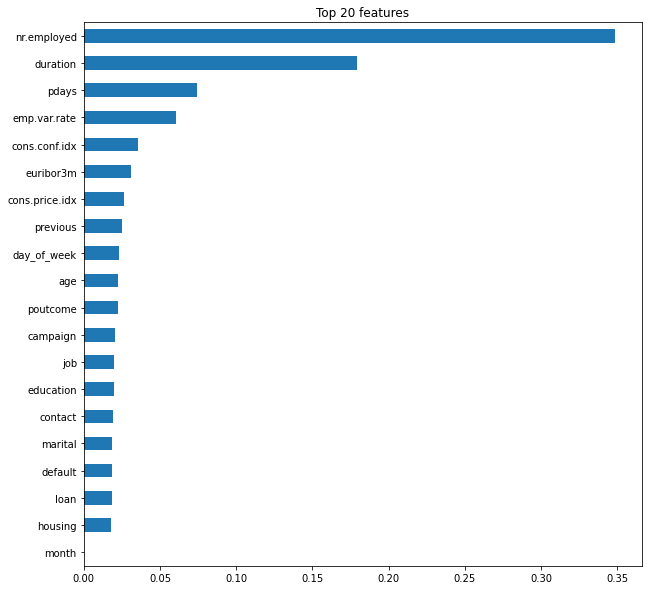

In [ ]:
#Feature Importance

xgb = pipe.named_steps['xg']
importances = pd.Series(xgb.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
#Permutation Importance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xg'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

default          -0.001548
housing          -0.001002
contact          -0.000486
job              -0.000364
marital          -0.000212
age              -0.000061
month             0.000000
loan              0.000152
cons.conf.idx     0.000152
previous          0.000455
day_of_week       0.000486
campaign          0.000698
cons.price.idx    0.001153
education         0.001305
poutcome          0.002671
nr.employed       0.005068
pdays             0.005372
emp.var.rate      0.008528
euribor3m         0.012352
duration          0.027314
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야함
)

Weight,Feature
0.0273 ± 0.0010,duration
0.0124 ± 0.0052,euribor3m
0.0085 ± 0.0011,emp.var.rate
0.0054 ± 0.0007,pdays
0.0051 ± 0.0012,nr.employed
0.0027 ± 0.0016,poutcome
0.0013 ± 0.0013,education
0.0012 ± 0.0011,cons.price.idx
0.0007 ± 0.0012,campaign
0.0005 ± 0.0016,day_of_week


Feature Top 5
1. nr.employed
2. duration
3. pdays
4. emp.var.rate
5. cons.conf.idx

Permutation Top 5 
1. Duration
2. euribor3m
3. emp.var.rate
4. pdays
5. nr. employed

cons.conf.idx와 euribor 3m의 차이가 있다

이외 값들은 모두 비슷하게 나왔다.

특히 duration이 상위권을 차지하고 있다


In [ ]:
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (26360, 20) (6590, 20)


In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [ ]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (26360, 8) (6590, 8)


In [ ]:
per_pipe = Pipeline([
                 ('preprocessing', make_pipeline(OrdinalEncoder(ord_mapping),
                               CatBoostEncoder(cat_feature))),
                 ('xg', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.2, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=0.12697734074390765,
               seed=None, silent=None, subsample=1, verbosity=1
                 )) 
])
per_pipe.fit(X_train_selected, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=[], drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[], return_df=True,
                                                 verbose=[{'col': 'month',
                                                           'mapping': {'apr': 4,
                                                                       'aug': 10,
                                                                       'dec': 12,
                                                                       'feb': 2,
                                                                       'jan': 1,
                                                                    

In [ ]:
permuter.feature_importances_ - permuter.feature_importances_std_ > 0

array([False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

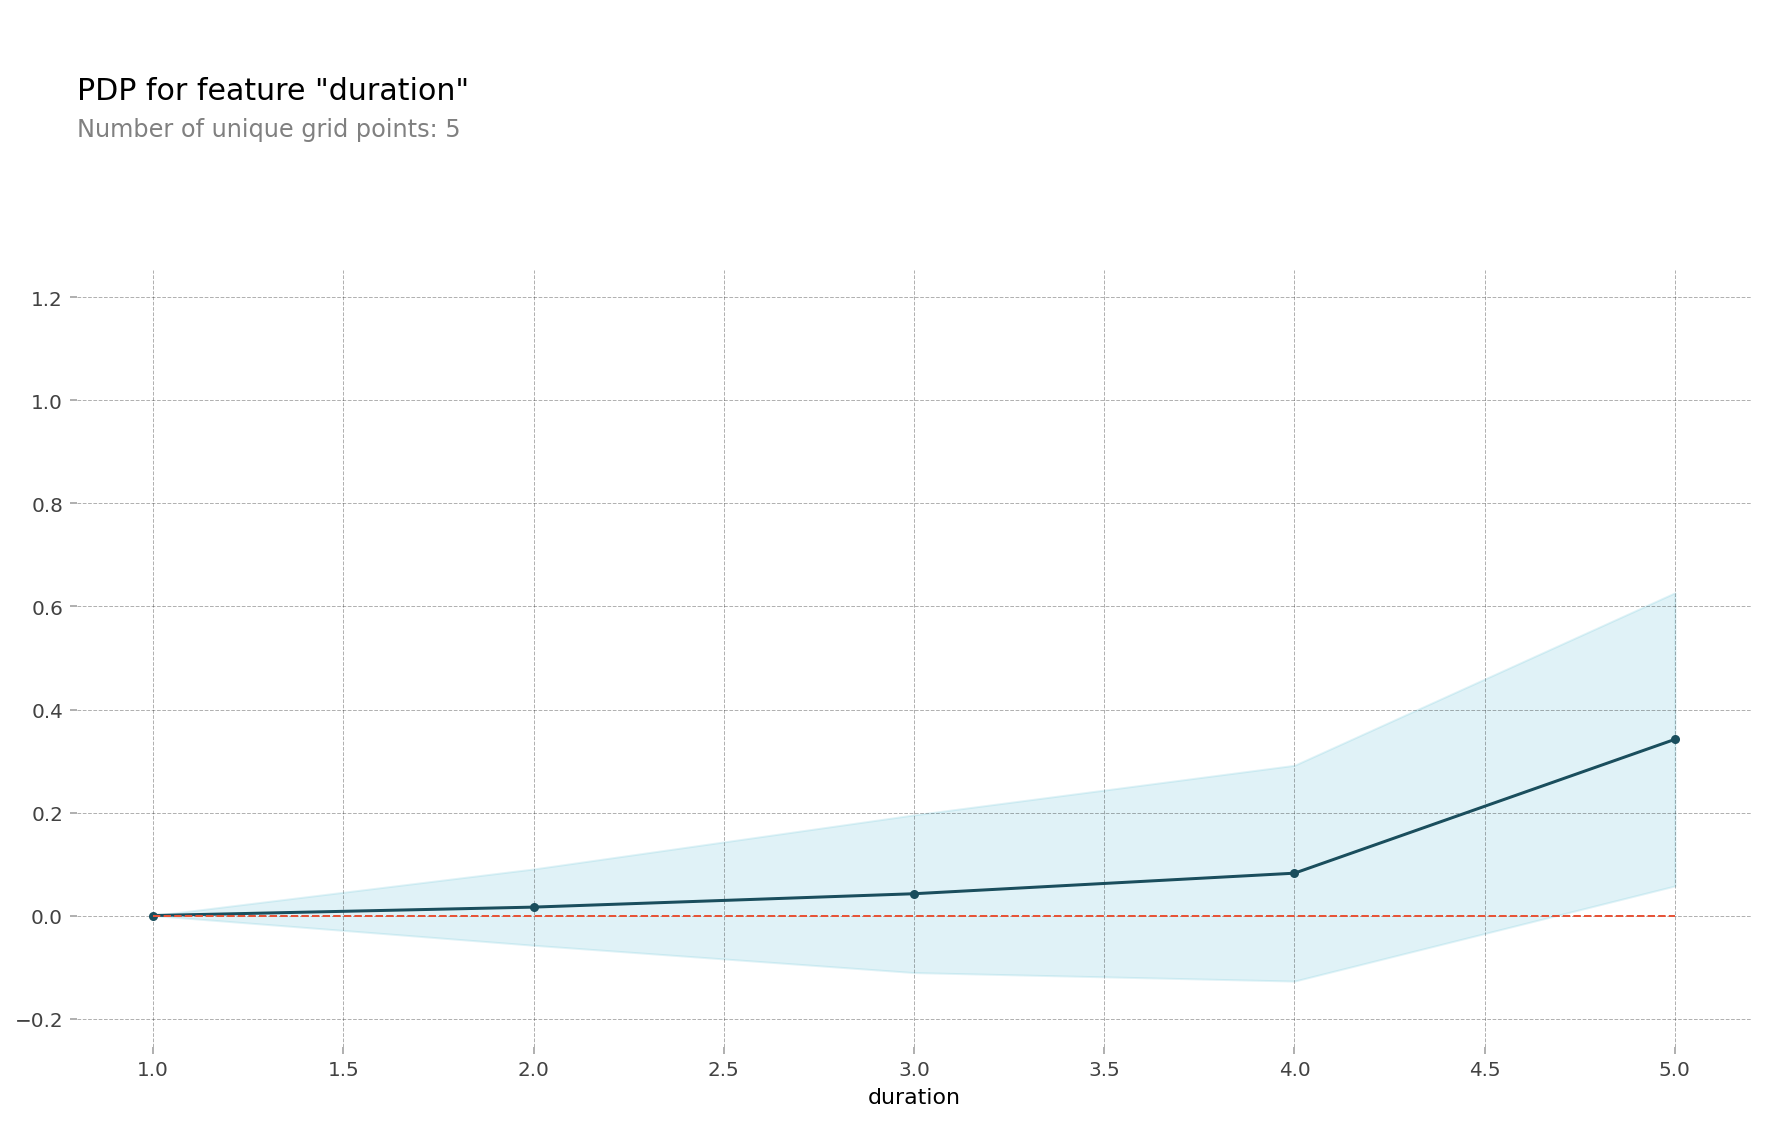

In [ ]:
#PDP_plot

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'duration'

isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

Duration은 가장 최근 고객과의 통화 시간이다

분석결과 통화길이가 길어 질 수록 예금 가입 확률이 높아진다.

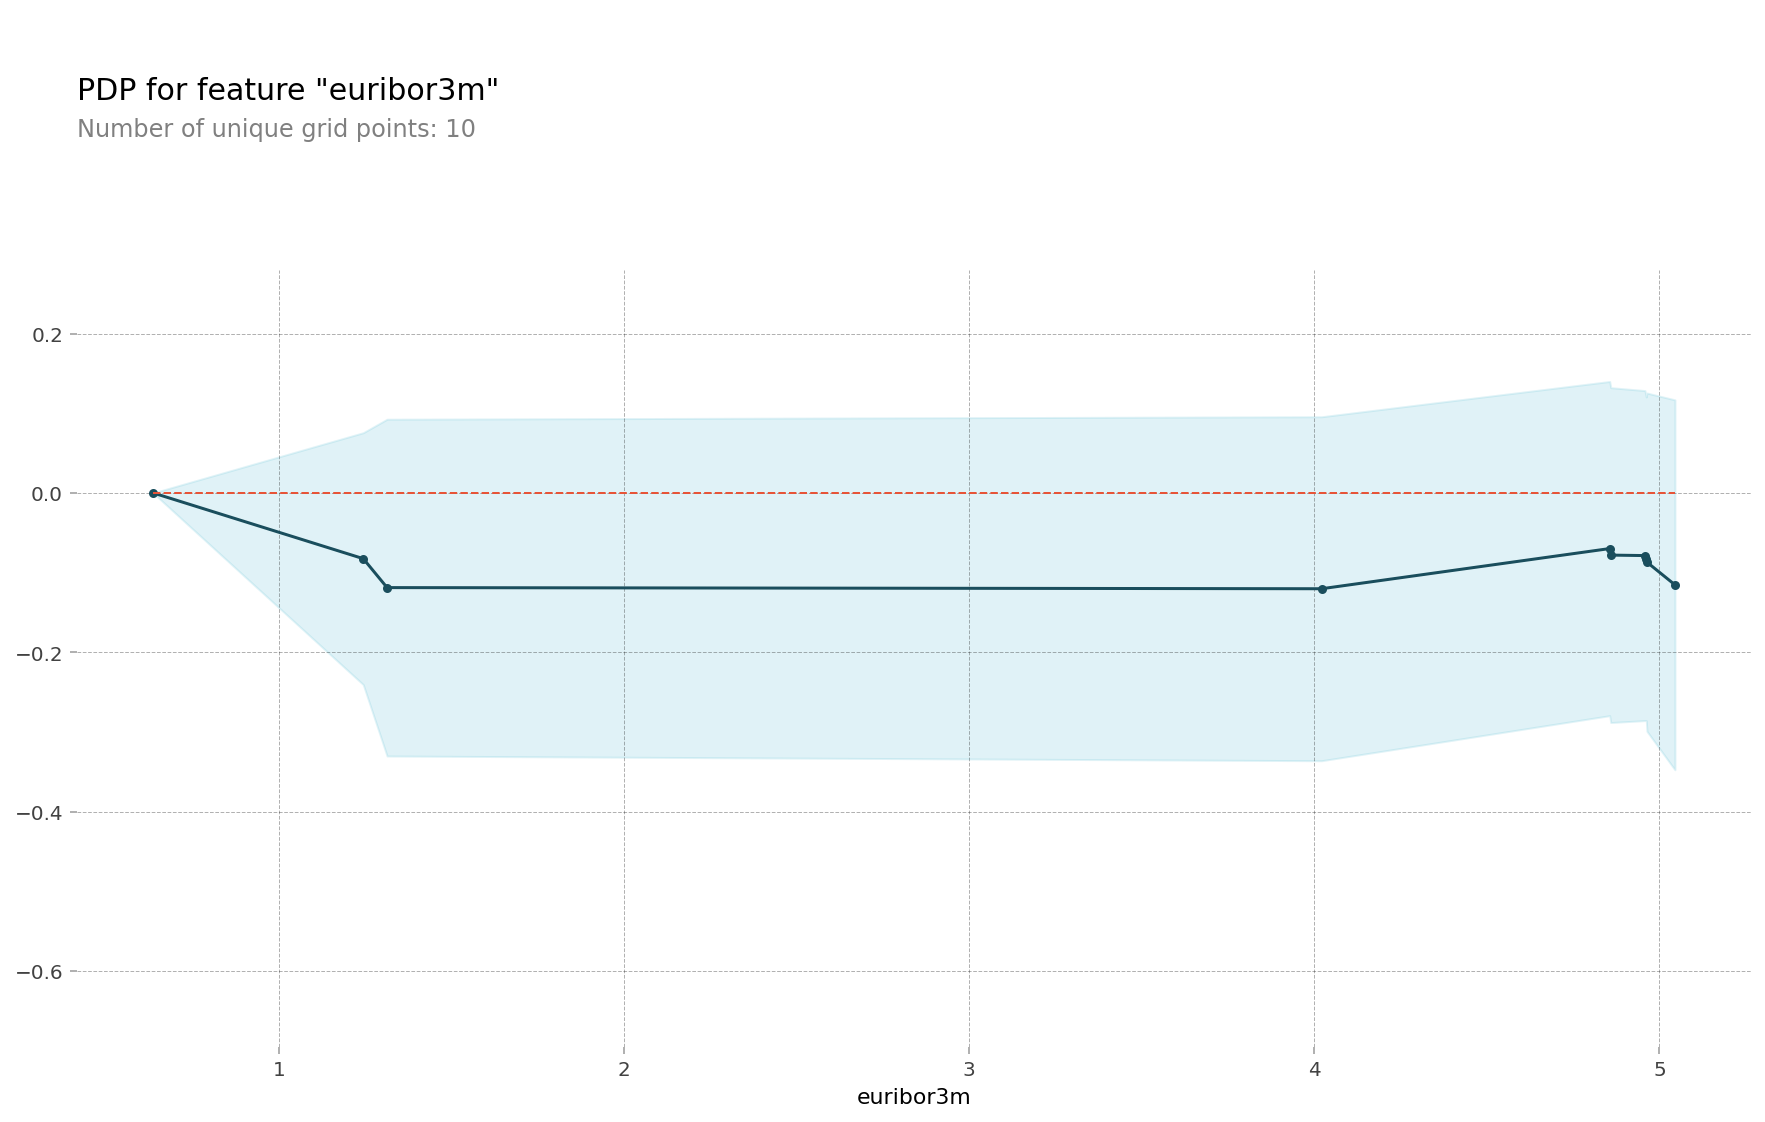

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'euribor3m'

isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

유리보는 유로화를 단일 통화로 시중은행간의 단기차입 금리이다. 

3-month가 가장 거래가 많이 되기 때문에 euribor 3m이 대표적인 예시이다.

분석결과 금리가 높아질수록 텔레마케팅의 효과가 낮으나 4 후반대에 높아지는 것을 볼 수 있다.

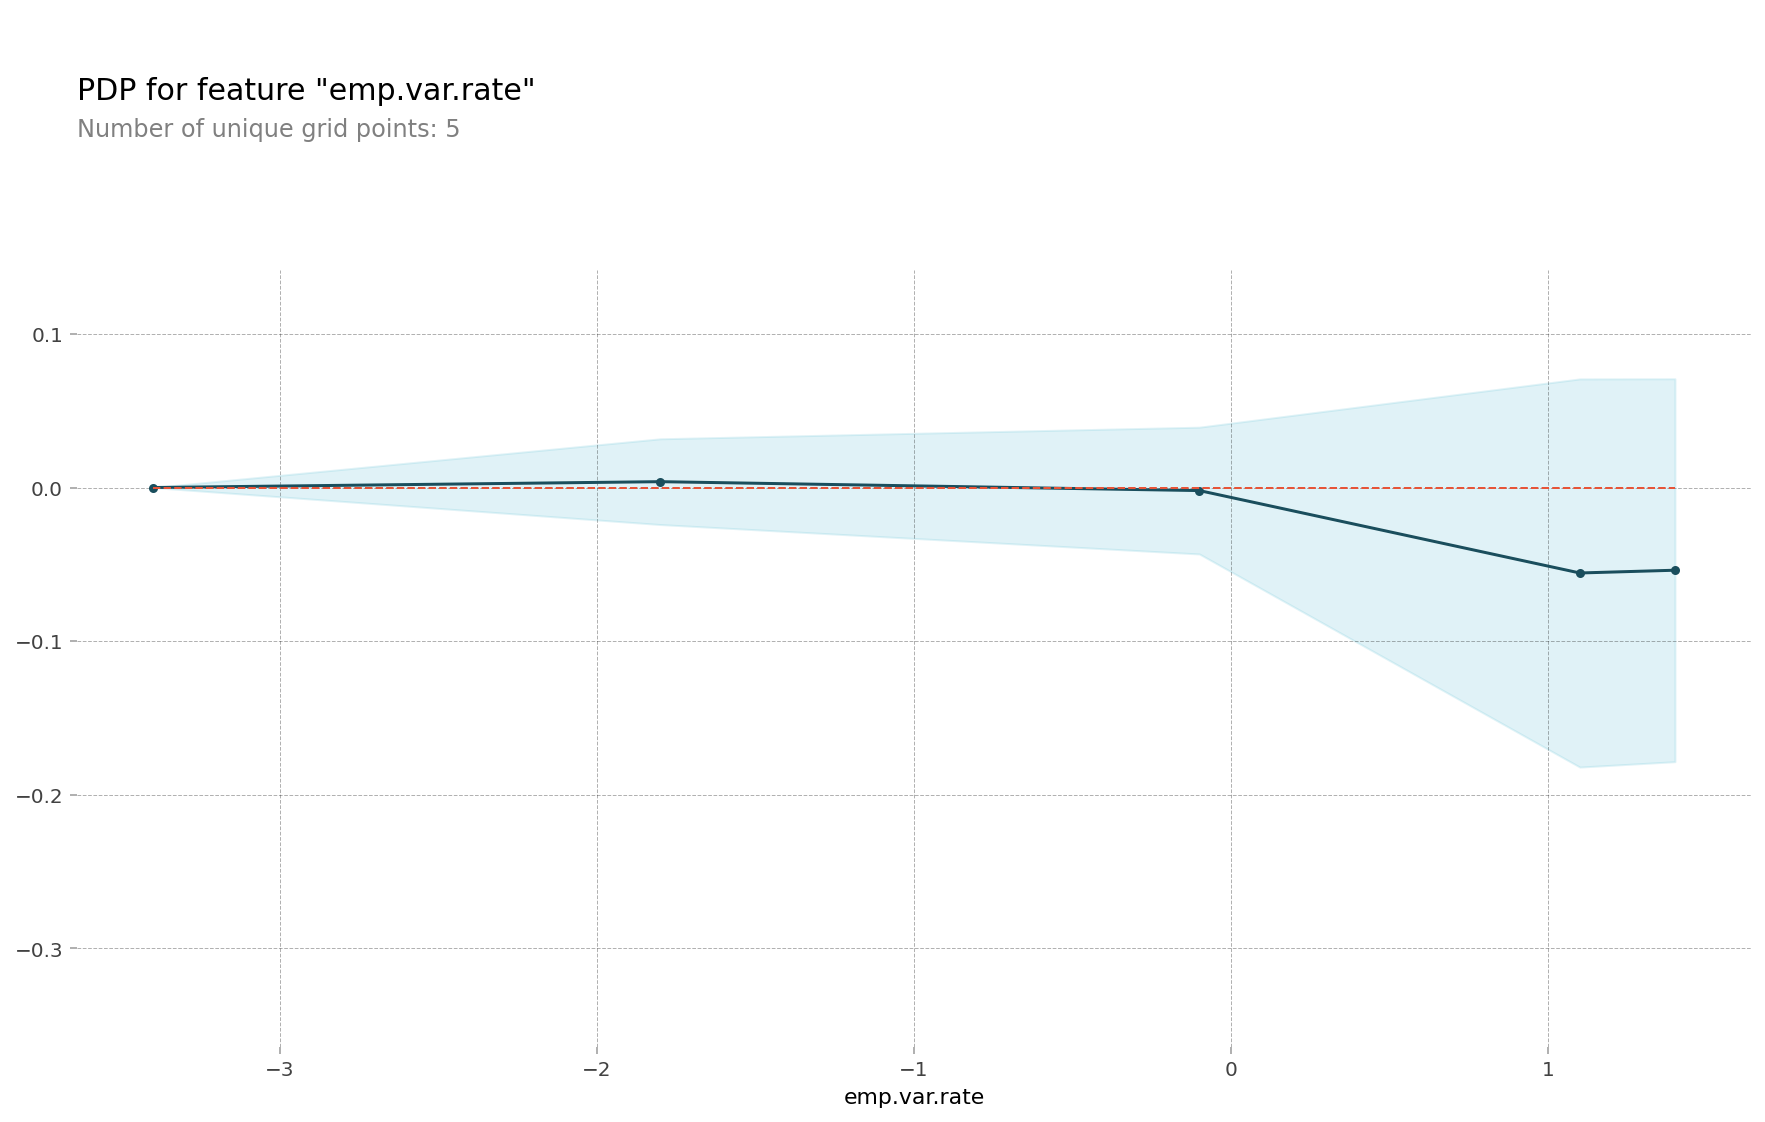

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'emp.var.rate'

isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

emp.var.rate = employment variation rate

기준은 quarter이며 분기별 고용률이다.

분기별 고용률을 보았을 때 고용률이 낮을 때 오히려 증가 하는 것을 볼 수 있다. 이는 시장 불안정성 때 소비 위축 심리를 나타내는 것이라고 보여 진다. 이와 같이 고용률이 좋아졌을 때 소비활성화가 일어나 deposit이 낮아 지는 것을 볼 수 있다.


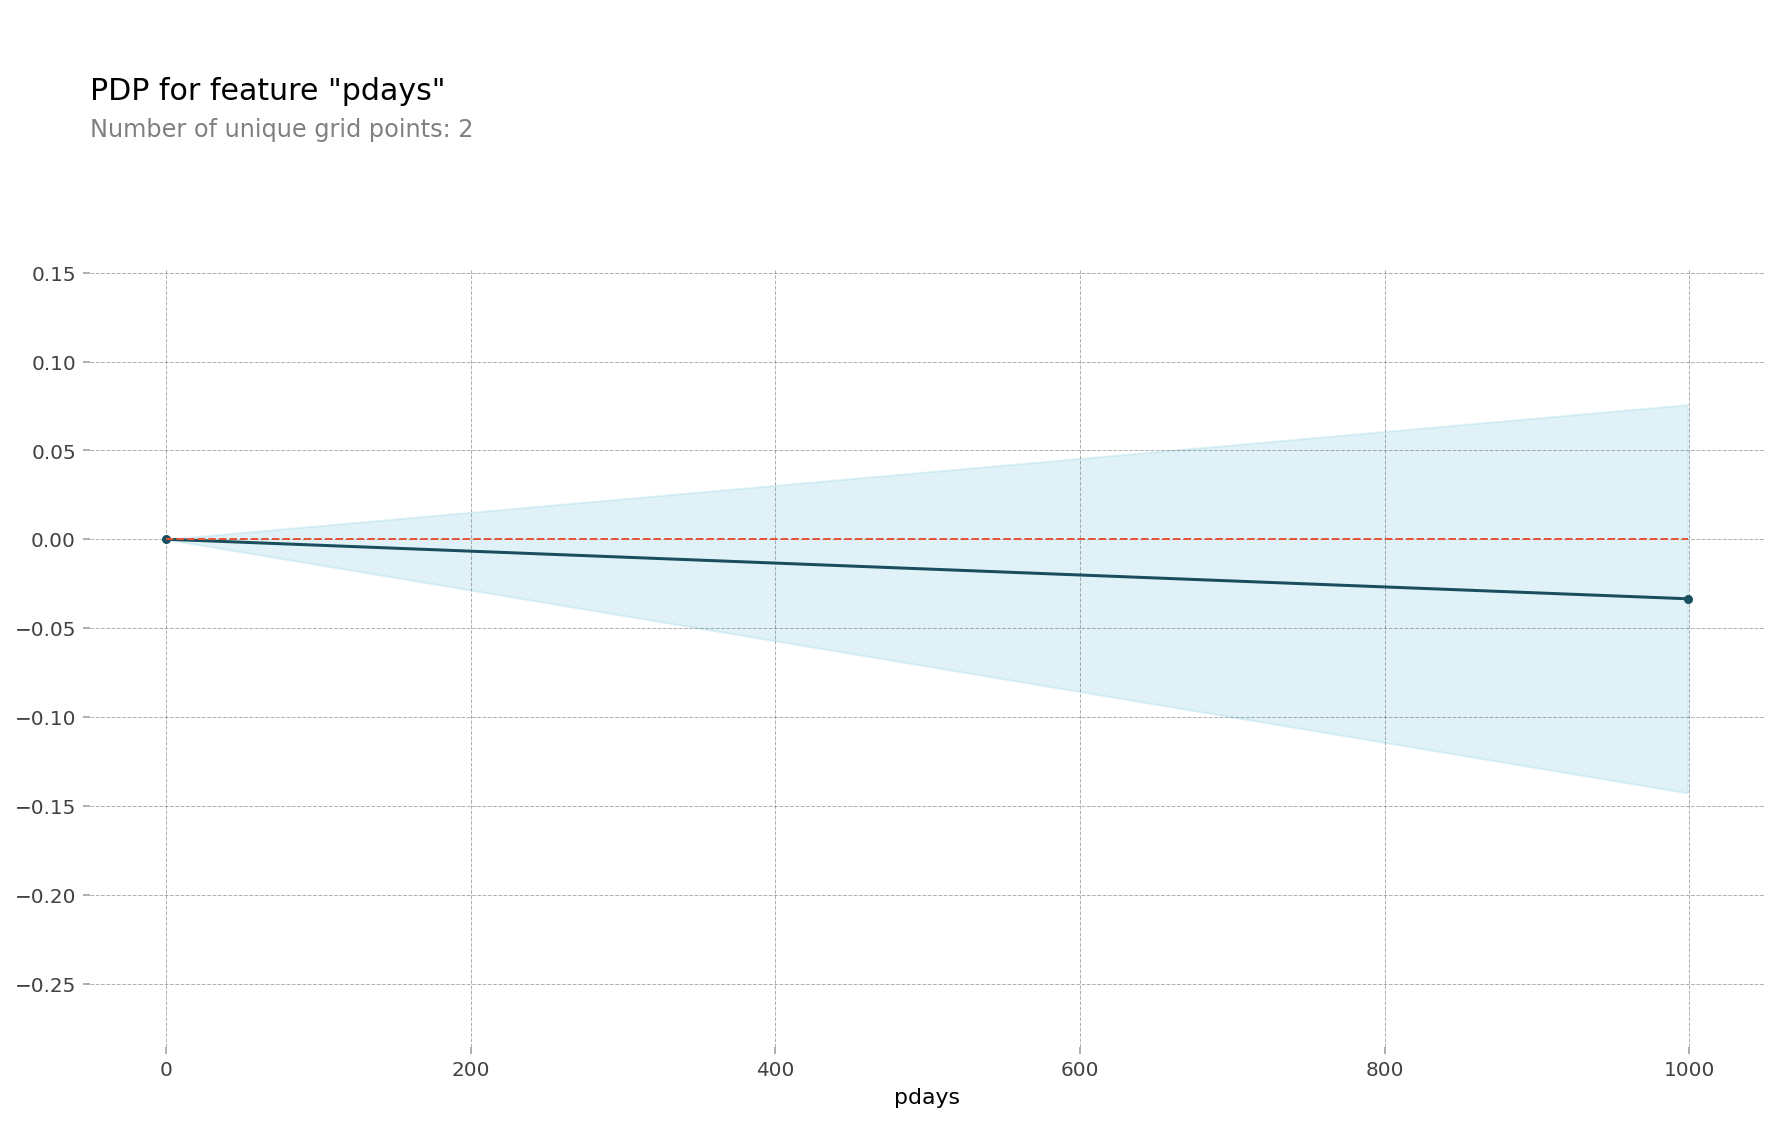

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'pdays'

isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

고객에게 Campaign을 진행 한 후로 몇일이 지날수록 deposit 결과로 이어질지에 대한 그래프이다.

고객에게 연락 후 시간이 지날수록 deposit 확률은 떨어진다

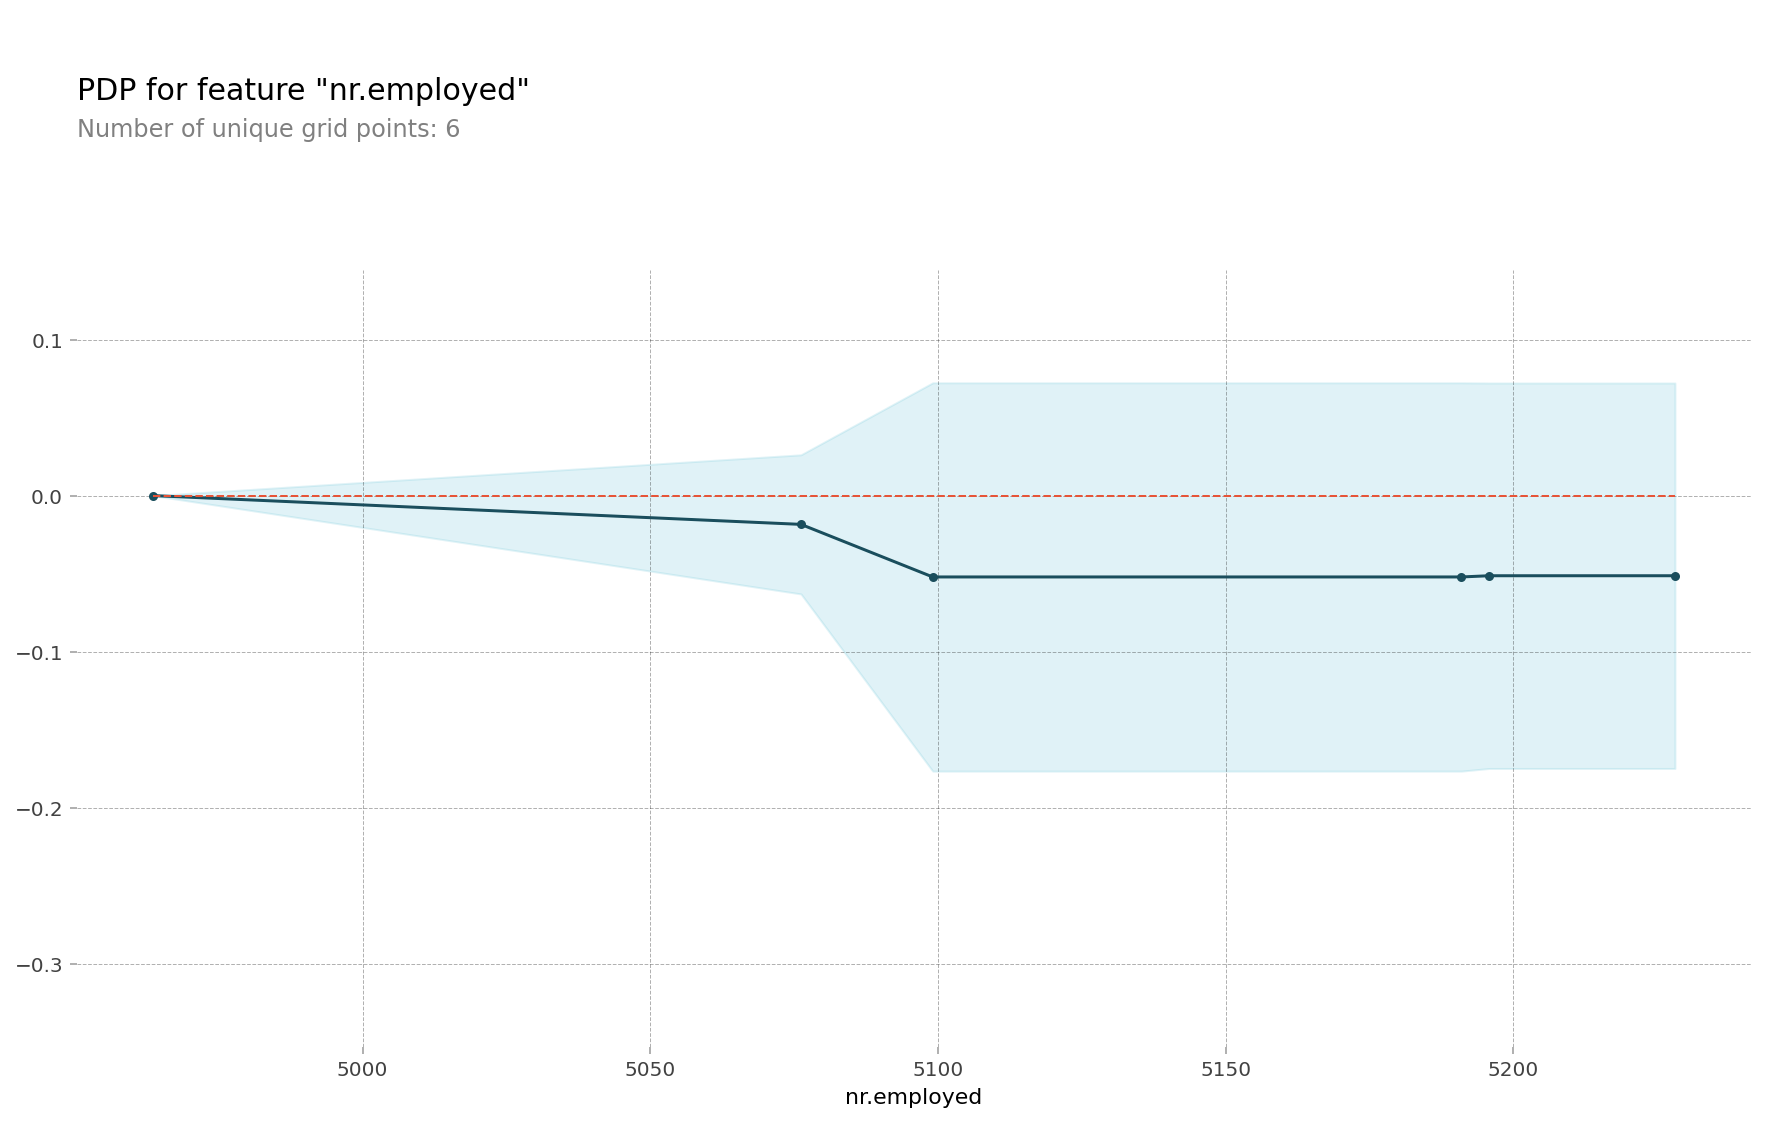

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'nr.employed'

isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

취업자가 많아 짐에 따라 deposit의 변화이다. Deposit 자체의 분표율을 보면 0이 앞도적으로 많다. 그 의미는 취업자가 많아질 수록 deposit을 할 확률이 높아지지만 반대로 안할 확률이 더 높아진다는 것이다. 따라서 음의 그래프인 것을 볼수있다. 

In [ ]:
#PDP 2 특성 사용

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['education', 'age']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

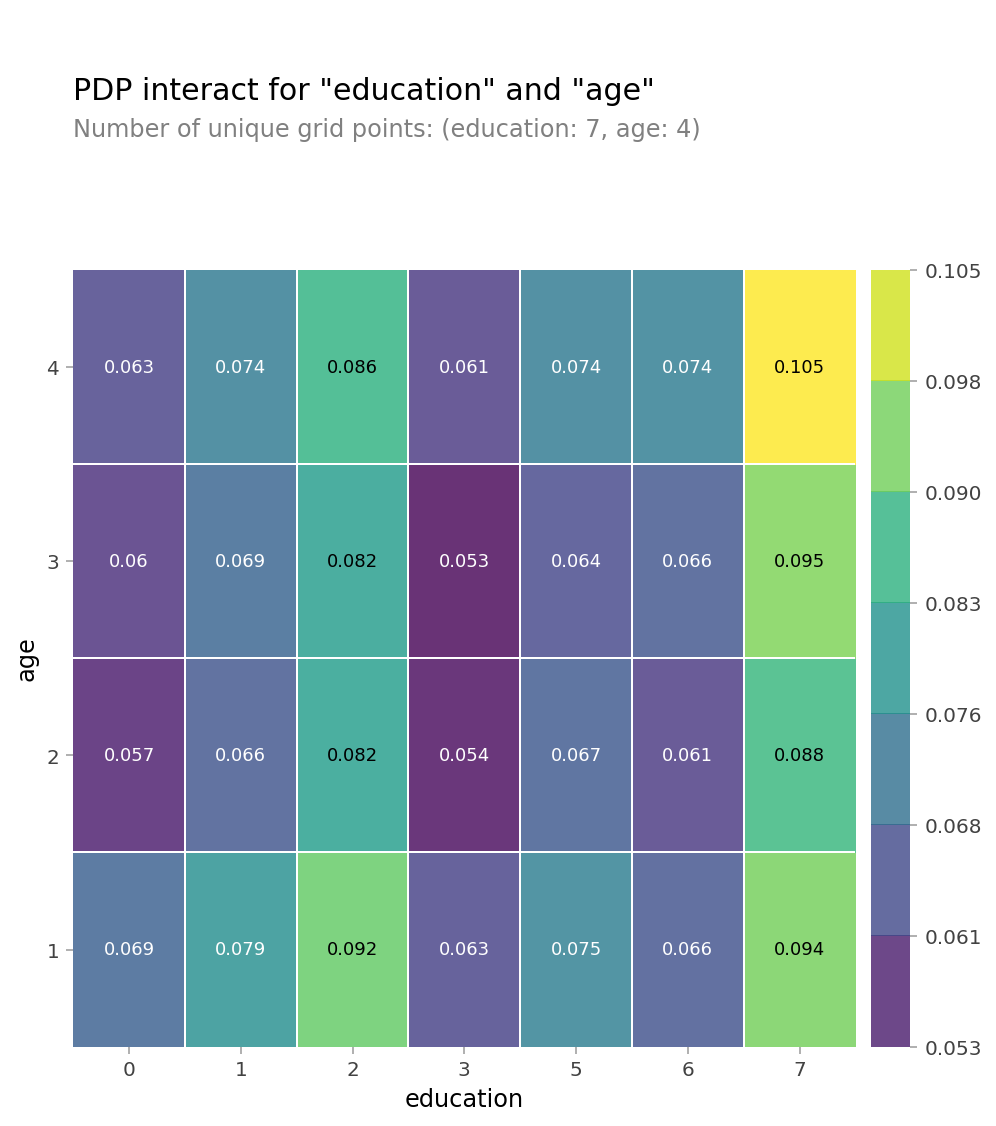

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

**education**

basic.4y    0

basic.6y    1

basic.9y      2

high.school  3

illiterate 4

professional.course    5 

university.degree  6

unknown    7

**age**

  32 이하 1

  32 초과 47 이하 2

  47 초과 70 이하 3

  70 초과 98 이하 4

Education과 Age 분석 결과

확실히 가장 활발하게 직업 활동을 하며 수입이 가장 많은 세대인 카테고리 3 (47-70)세대가 노후 준비 등으로 인해 높은 deposit을 보이며 카테고리 2 또한 그 뒤를 따른다

더불어 직업 같은 경우도 

교육 파트는 교육 받은 수준이 높아 질 수록 deposit을 할 확률이 높아진다.

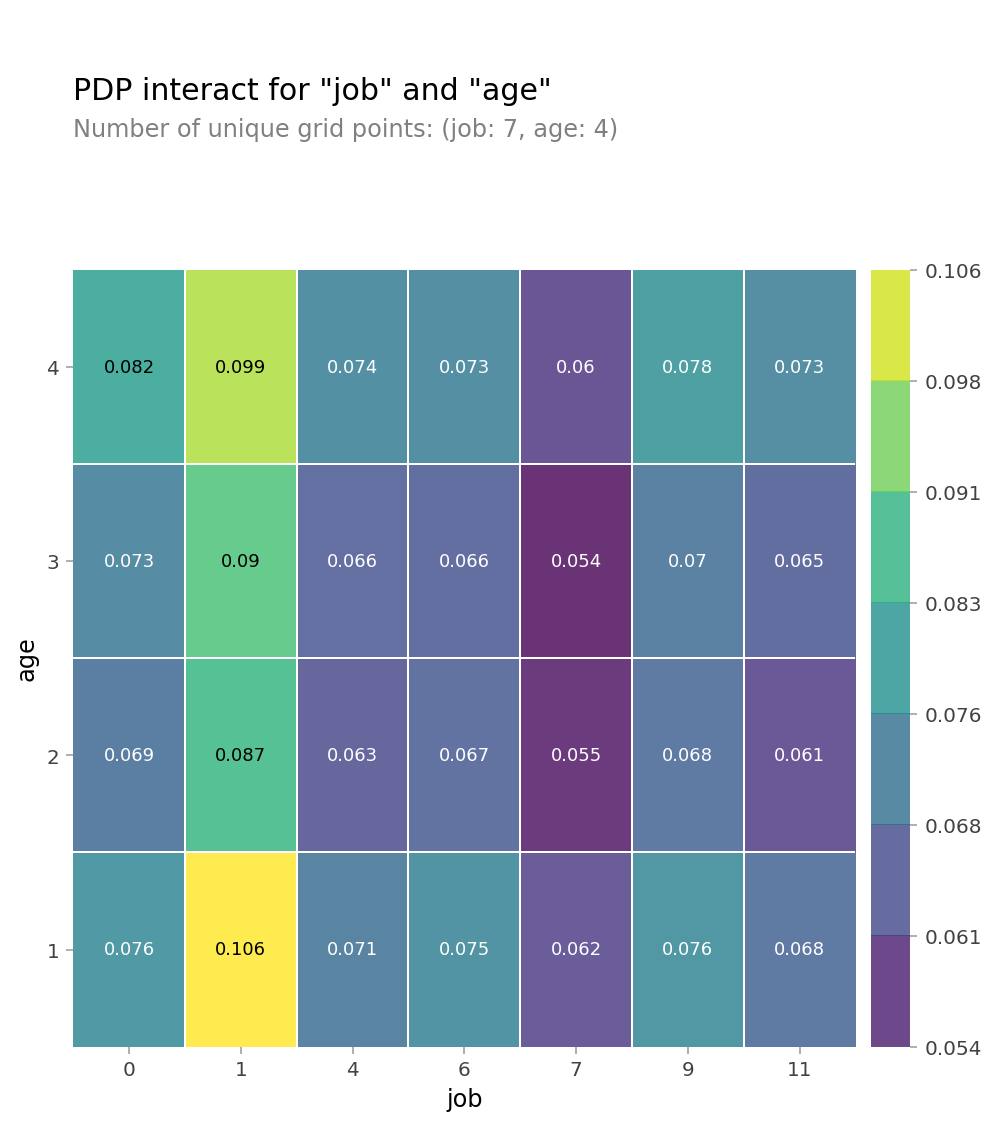

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['job', 'age']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

**job**

0 admin.           
1 blue-collar     
2 entrepreneur
3 housemaid            
4 management        
5 retired            
6 self-employed    
7 services            
8 student 
9 technician
10 unemployed            
11 unknown     


**age**

  32 이하 1

  32 초과 47 이하 2

  47 초과 70 이하 3

  70 초과 98 이하 4

생산직이 가장 예금 가입률이 높으며 32살 이하가 가장 높은 가입률을 보인다.

가장 낮은 가입률은 서비스 직종으로 32-70살이 가입률이 낮다

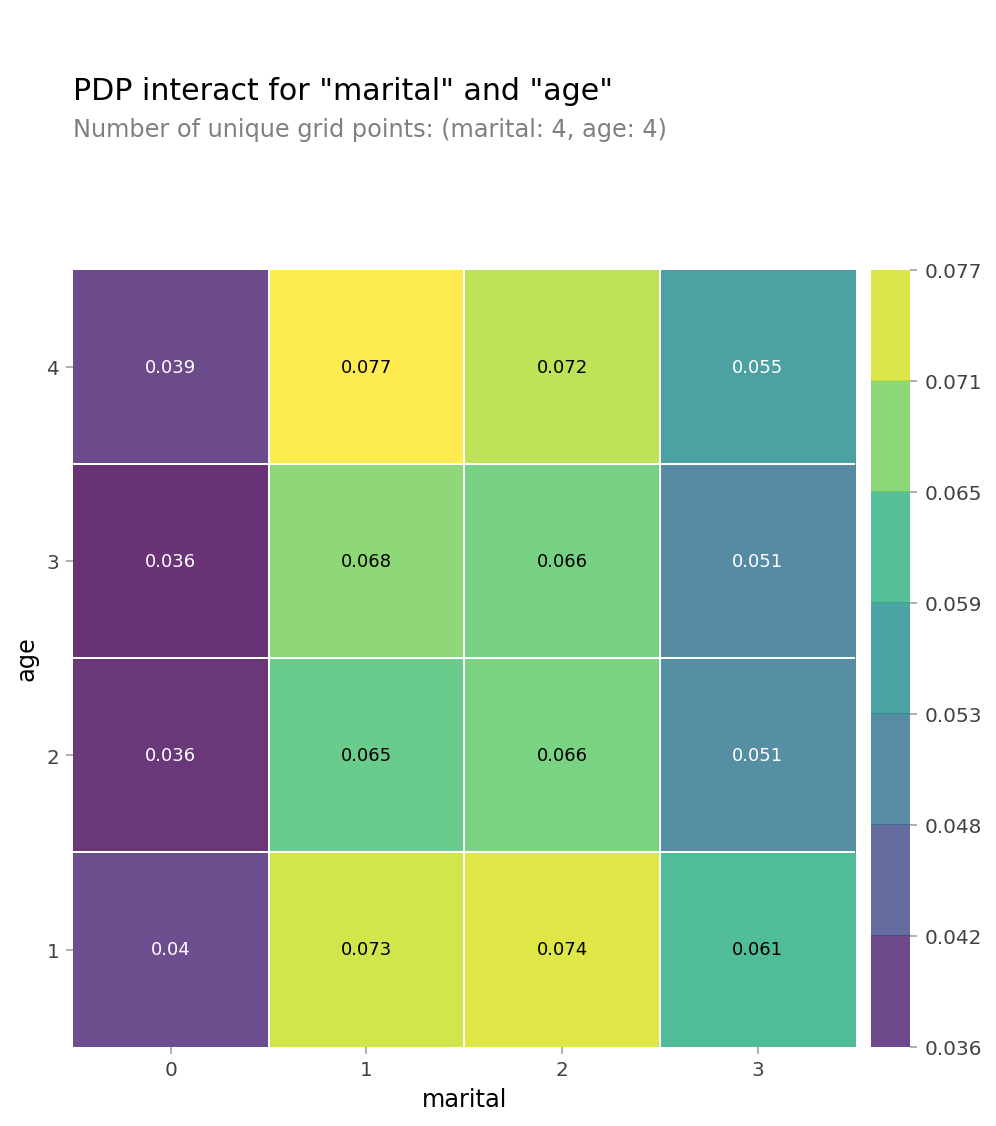

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['marital', 'age']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

marital 

0 = divorced
1 = married
2 = single
3 = unknown


결혼 한 부부가 예금 가입이 가장 높았고 그 중 젊은 부부가 가장 높았다.

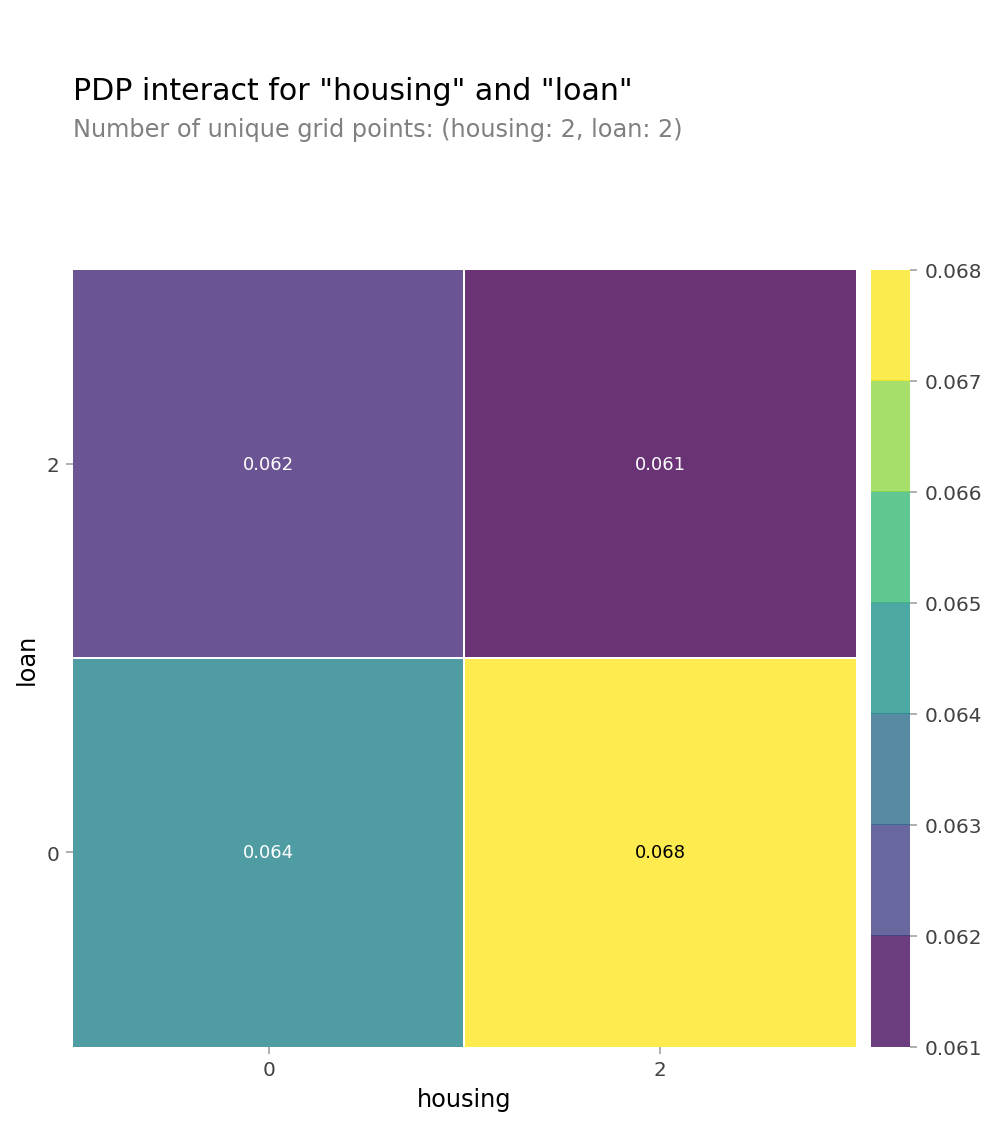

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['housing', 'loan']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

**Housing**

yes = 2
no = 0

**Loan**
yes = 2
no =0

집 관련 대출이 없는데 일반 대출이 있으면 예금 가입률이 높다

In [ ]:
#SHAP

processor = make_pipeline(
    OrdinalEncoder())

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)# 검증데이터



eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, 
          eval_set=eval_set,
          eval_metric='auc',
          early_stopping_rounds=10)

[0]	validation_0-auc:0.834958	validation_1-auc:0.838133
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.834978	validation_1-auc:0.838157
[2]	validation_0-auc:0.851035	validation_1-auc:0.850677
[3]	validation_0-auc:0.852174	validation_1-auc:0.851554
[4]	validation_0-auc:0.857356	validation_1-auc:0.85561
[5]	validation_0-auc:0.857344	validation_1-auc:0.855565
[6]	validation_0-auc:0.857341	validation_1-auc:0.855569
[7]	validation_0-auc:0.857762	validation_1-auc:0.855946
[8]	validation_0-auc:0.880985	validation_1-auc:0.875578
[9]	validation_0-auc:0.881124	validation_1-auc:0.875555
[10]	validation_0-auc:0.881075	validation_1-auc:0.875598
[11]	validation_0-auc:0.881312	validation_1-auc:0.875812
[12]	validation_0-auc:0.881063	validation_1-auc:0.875608
[13]	validation_0-auc:0.91993	validation_1-auc:0.915661
[14]	validation_0-auc:0.920194	validation_1-auc:0.915944


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.12697734074390765,
              seed=None, silent=None, subsample=1, verbosity=0)

In [ ]:
row = X_test.iloc[[3160]]
row

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12510,3,1,1,0,0,0,2,1,3,mon,3,15,999,0,1,1.4,93.918,-42.7,4.96,5228.1


In [ ]:
import xgboost
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [ ]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [ ]:
print('deposit 예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

deposit 예측에 대한 Positive 요인 Top 3 입니다:
1. euribor3m : 4.96
2. default : 0
3. age : 3


Negative 요인 Top 3 입니다:
1. emp.var.rate : 1.4
2. duration : 3
3. nr.employed : 5228.1


In [ ]:
row = X_test.iloc[[250]]
row


explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

현재는 직업과 나이로 수입을 얼추 맞추어 고객에 대한 평가를 하려고 노력을 하였는데 특성이 추가 될 수 있다면 고객의 부를 나태날 수 있는 기준이 있으면 훨씬 효과적일 것 같다.